In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("glassdoor_cleaned_new.csv")



In [2]:
df

,Job Title,Location,Rating,monthly,min_salary_rupees,max_salary_rupees,avg_salary_rupees,company_name_cleaned,Standardized Title
0,Data Scientist,Bhubaneshwar,4.3,0,1000000,2300000,1650000.0,Nirmalya Labs,Data Scientist
1,Data Analytics Lead Analyst - C13 - BANGALORE,Bengaluru,3.7,0,600000,1000000,800000.0,Citi,Manager/Director
2,"Sr. Consultant, Data Science and Analytics",Bengaluru,4.0,0,1000000,1000000,1000000.0,TransUnion,Other
3,Lead Data Analytics Analyst (Vice President),Bengaluru,3.7,0,600000,1000000,800000.0,Citi,Manager/Director
4,AI Operations and Optimization Manager,Pune,3.7,0,500000,600000,550000.0,Ecolab Inc.,AI Engineer
...,...,...,...,...,...,...,...,...,...
661,6913 - Machine Learning Engineer,Bengaluru,4.5,0,400000,800000,600000.0,CoffeeBeans Consulting,ML Engineer
662,Lead ML Engineer,Bengaluru,4.5,0,500000,800000,650000.0,Avaamo,ML Engineer
663,AI / ML Engineer,Vellore,2.2,0,200000,700000,450000.0,Xploria,ML Engineer
664,AI Engineer,Bengaluru,4.5,0,500000,600000,550000.0,TrellisSoft,AI Engineer


In [3]:
df.shape

(666, 9)

In [4]:
df.describe()

,Rating,monthly,min_salary_rupees,max_salary_rupees,avg_salary_rupees
count,637.000000,666.000000,6.660000e+02,6.660000e+02,6.660000e+02
mean,3.829042,0.067568,5.352718e+05,8.240916e+05,6.796817e+05
std,0.612209,0.251191,7.179786e+05,6.760896e+05,6.213390e+05
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000,0.000000,3.000000e+05,6.000000e+05,4.500000e+05
50%,3.900000,0.000000,4.000000e+05,8.000000e+05,6.000000e+05
75%,4.100000,0.000000,6.000000e+05,9.750000e+05,7.500000e+05
max,5.000000,1.000000,9.700000e+06,6.700000e+06,6.200000e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             666 non-null    object 
 1   Location              650 non-null    object 
 2   Rating                637 non-null    float64
 3   monthly               666 non-null    int64  
 4   min_salary_rupees     666 non-null    int64  
 5   max_salary_rupees     666 non-null    int64  
 6   avg_salary_rupees     666 non-null    float64
 7   company_name_cleaned  666 non-null    object 
 8   Standardized Title    666 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 47.0+ KB


In [6]:
missing = df.isnull().sum()
print(missing[missing > 0])


Location    16
Rating      29
dtype: int64


In [7]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [8]:
print(df['Location'].value_counts().head(10))

Location
Bengaluru    257
Hyderābād     65
Chennai       49
Pune          44
Gurgaon       32
Mumbai        29
Noida         28
Remote        27
India         26
Mohali        17
Name: count, dtype: int64


In [9]:
print(df['company_name_cleaned'].value_counts().head(10))

company_name_cleaned
EY               12
Optum            10
Visa              9
JPMorganChase     9
Wipro Limited     9
Google            9
Qualcomm          8
Apple             7
Target            6
Citigroup         6
Name: count, dtype: int64


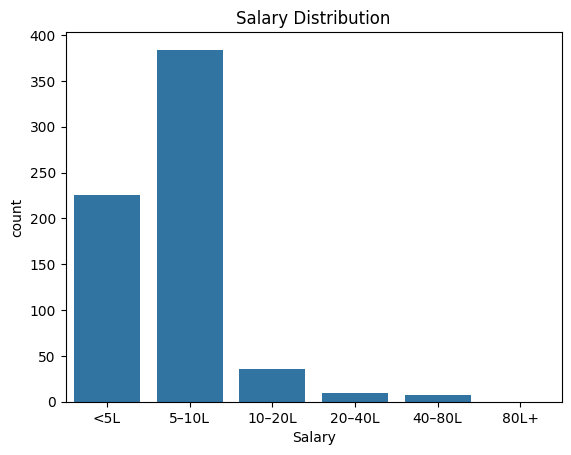

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
bins = [0, 500000, 1000000, 2000000, 4000000, 8000000, 20000000]
labels = ['<5L', '5–10L', '10–20L', '20–40L', '40–80L', '80L+']
df['Salary'] = pd.cut(df['avg_salary_rupees'], bins=bins, labels=labels)

sns.countplot(x='Salary', data=df, order=labels)
plt.title("Salary Distribution")
plt.show()


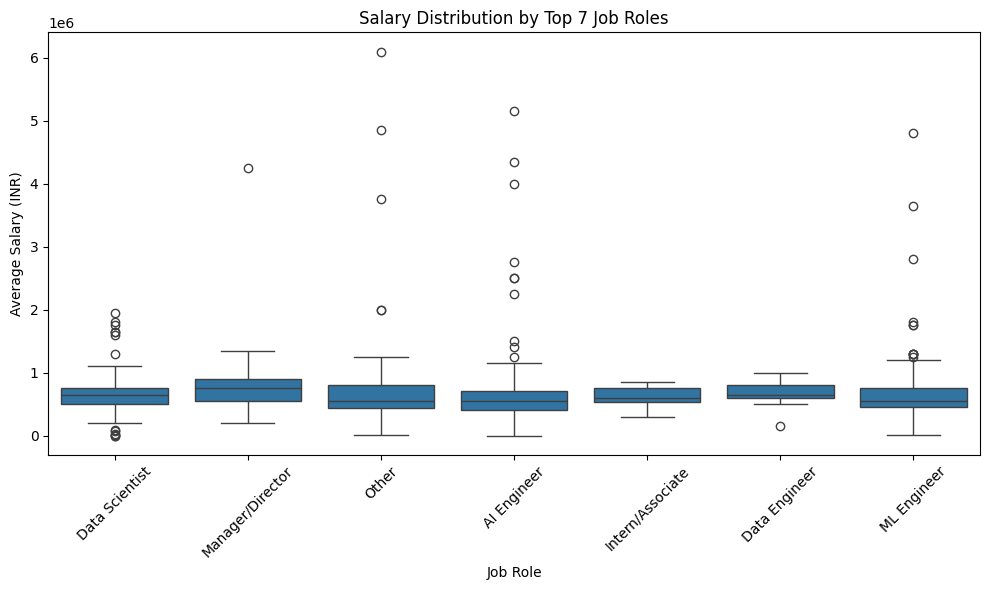

In [11]:
top_roles = df['Standardized Title'].value_counts().nlargest(7).index

# Filter DataFrame to include only those roles
top_df = df[df['Standardized Title'].isin(top_roles)]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Standardized Title', y='avg_salary_rupees', data=top_df)
plt.xticks(rotation=45)
plt.title("Salary Distribution by Top 7 Job Roles")
plt.ylabel("Average Salary (INR)")
plt.xlabel("Job Role")
plt.tight_layout()
plt.show()

In [12]:
# import matplotlib.ticker as mtick

# plt.figure(figsize=(10, 6))
# sns.histplot(df_valid['avg_salary_rupees'], bins=30, kde=True, color='skyblue')

# plt.title("Distribution of Average Salary (Rupees)", fontsize=14)
# plt.xlabel("Average Salary (INR)", fontsize=12)
# plt.ylabel("Frequency", fontsize=12)

# formatter = mtick.FuncFormatter(lambda x, _: f"{int(x):,}")
# plt.gca().xaxis.set_major_formatter(formatter)

# plt.grid(True)
# plt.tight_layout()
# plt.show()


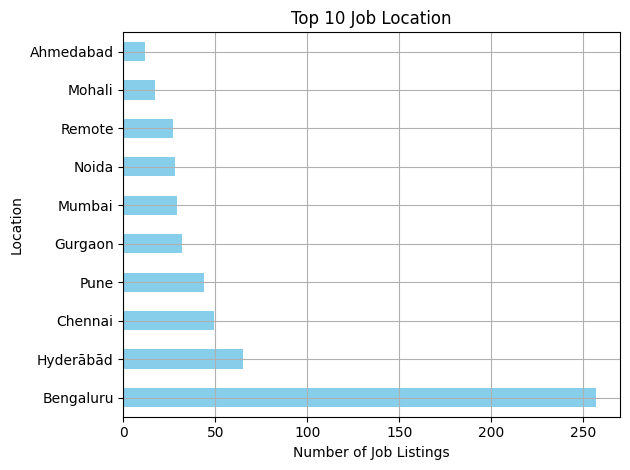

In [13]:

filtered_df = df[df['Location'].str.strip().str.lower() != 'india']


top_locs = filtered_df['Location'].value_counts().head(10)

top_locs.plot(kind='barh', color='skyblue')
plt.title("Top 10 Job Location")
plt.xlabel("Number of Job Listings")
plt.ylabel("Location")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# df.to_csv("glassdoor_cleaned_new_final.csv", index=False)
